## Introduction to Deep Learning
# Part 2 - Non Linear Perceptron

In [48]:
import numpy as np
import utils_plot as uplot
import matplotlib.gridspec as gridspec
from sklearn.metrics import accuracy_score, log_loss
from keras.datasets import mnist
import matplotlib.pyplot as plt
%matplotlib inline  

## OK this was learning, but were is the Deep ?
* Well we can add more layers to our perceptron, 
* but it will not change nothing. <br>
> Simple algebra show that any feed forward neural network, with linear activation function, can be reduced to a one layer perceptron.

* **A percepron with linear activation function, is a linear classifier.**<br>
* **Linear Perceptron can distinguish data that is linearly separable.** <br>
* **To extend learning, we need to use non-linear activation functions**

### Non Linear Activation function

Non Linear activation function, Allow model to generalize better.


#### Sigmoid activation function
logistic function, which ranges from 0 to 1
Used as last layer, guarantee to output probability<br>
The logistic sigmoid function can cause a neural network to get stuck at the training time.
#### Logistic Sigmoid:  
![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/part2_form1.JPG)

##### characteristics  of Sigmoid function:
* Smooth, derivable and map any value to (0,1).
* Y values are steep in (-2,2), That means this function tends to bring the activations to either side of the curve, which creates clear distinction. So Sigmoid function, is a good classifier.
* Y values flattens when we move from zero, meaning Y response to change in X is very small to almost none, causing the net to stop learning or learn very slowly. This problem is also called "vanishing gradient", and we will discus it more later.

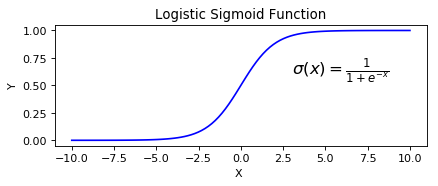

In [49]:
uplot.drow_sigmoid()

#### Tanh Sigmoid:  
hyperbolic tangent that ranges from -1 to 1
![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/part2_form2.JPG)

So tanh not only look similar to Sigmoid, but its a scaled sigmoid function. So characteristics, is quit similar to logistic sigmoid.The main difference is that tanh is steeper near Zero, and maps input to (-1, 1)

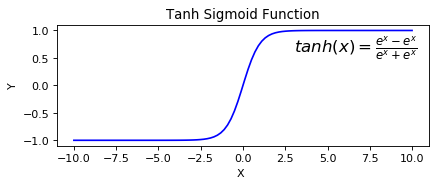

In [50]:
uplot.drow_tanh()

### ReLU (Rectified Linear Unit) Activation Function

The ReLU is the most used activation function in the world right now.Since, it is used in almost all the convolutional neural networks or deep learning.<br>
### *relu(x)=max(0,x)*

#### ReLU characteristics:

* The range of ReLu is The range of ReLu is \[0, inf). This means it can blow up the activation.
* In a large network, the Sigmoid activation function, will "fire" all the time, causing a dense and costly network. Relu, due to output 0 for negative values of x, will cause a spars,more efficient network.
* 

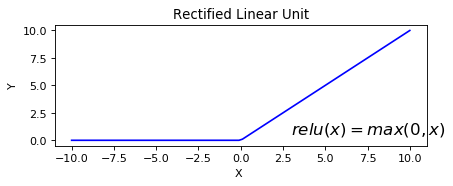

In [51]:
relu = lambda x:  np.maximum(0, x)
uplot.drow_function(func=relu, func_name='Rectified Linear Unit',
                 func_formula = r'$relu(x)=max(0,x)$')

### Sofmax
Softmax actually extends Sigmoid to the multi class case. Softmax assigns probability to each class in a multi-class problem. Those probabilities must be positive and add up to 1.0.<br>
Softmax is used in a neural network as the layer just before the output layer, and the number of outputs, is same as the number of classes we need to classify.

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/part2_form3.JPG)
#### Example:

In [52]:
def sofmax_func(z):
    return (np.exp(z)/np.sum(np.exp(z)))

In [53]:
print('[8,4,8] => ',sofmax_func([8,4,8]))
print('[1,2,3,4] => ',sofmax_func([1,2,3,4]))
print('[-2,2,-2,2] => ',sofmax_func([-2,2,-2,2]))

[8,4,8] =>  [0.49546264 0.00907471 0.49546264]
[1,2,3,4] =>  [0.0320586  0.08714432 0.23688282 0.64391426]
[-2,2,-2,2] =>  [0.0089931 0.4910069 0.0089931 0.4910069]


## Handwritten Digit Classification (Mnist ) 
### Classification example
Based on:
* https://www.coursera.org/learn/neural-networks/lecture/zO1Is/a-simple-example-of-learning-6-min<br>
We will train a simple FFN - Perceptron on Mnist data.

#### Load Minst Data

In [54]:
from sklearn.utils import shuffle

batch_size = 128
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = shuffle(x_train, y_train , random_state=0)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.
x_test /= 255.
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


#### Lest View some examples

(28, 28)
Lables are:  [3 6 6 6 0 3 6 2]
Lables are:  [5 8 2 4 0 1 2 1]


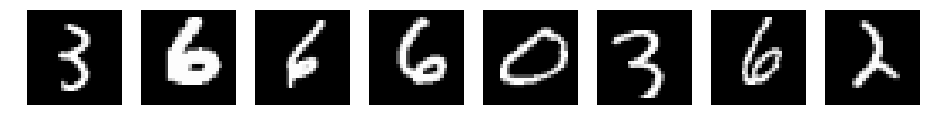

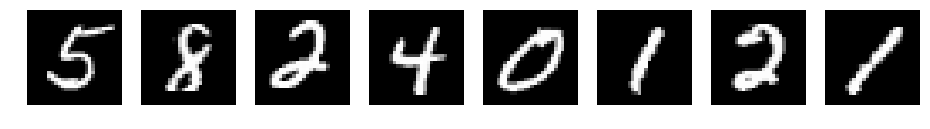

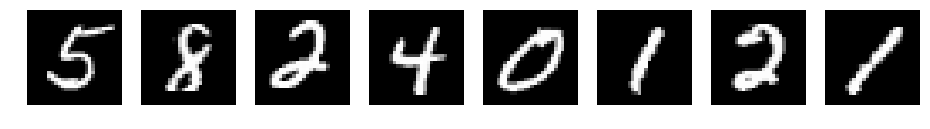

In [55]:
import matplotlib_utils as umplot
print(x_train[0].shape)
print('Lables are: ', y_train[0:8])
umplot.show_list_images(x_train[0:8])
print('Lables are: ', y_train[80:88])
umplot.show_list_images(x_train[80:88])

umplot.show_list_images(x_train[80:88])

### Perceptron Scheme
* **Weights** will have following shape:  (n_classes, 28*28+1) 
> The one is for the bias, For clarity, we will drow only the first 28*28 weights

* **Predict** - predict the class that has the largest propability 
> We can mesaure "larger imapct" orpropability by by applying sofmax on Wx,and choosing the class with maximal propability.

![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/d6.png)
#### Update the weights
* **Correct** - If predictionis correct, do nothing
* **Misclasified** - if prediction is wrong:
    * Increas the weights of the correct class by input's active pixels 
    * Decrease the weights of misclassified class by input's active pixels 
<br>
![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/d5.png)

In [56]:
def predict(w, x):

    pred_val = np.dot(w, np.append(x, 1))
    pred_class = np.argmax(sofmax_func(pred_val))
    return pred_class

In [57]:
def clasify_mnist(X, Y,n_classes=10,num=100, epoch=1):
    
       
    np.random.seed(70)

    #w = np.zeros((n_classes,28*28+1))
    w = np.random.random_sample((n_classes,28*28+1))
    
    n_epoch = epoch
    num = num

    for j in range(n_epoch):
        
        acc = 0
        order = np.random.permutation(num)
        
        for i in range(num):

            x, y = X[order[i]], Y[order[i]]
            yhat = predict(w, x)
            
            if y == yhat:
                acc += 1
            else:
                
                w[y] += np.append(x, 1)
                w[yhat] -= np.append(x, 1)
            
        accuracy = acc / float(num)
        print ('Iteration %d: acc = %f' % (j+1, accuracy))
                
    return w

#### View the weighst after one sample

Iteration 1: acc = 0.000000


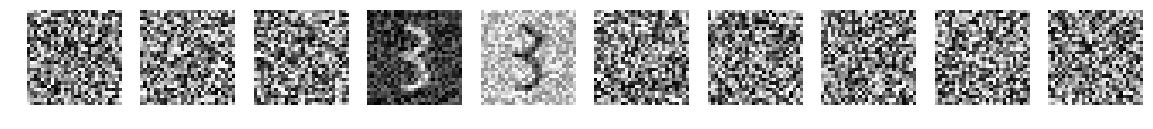

In [58]:
w = clasify_mnist(x_train, y_train,num=1,epoch=1)
umplot.show_list_images([w[i,0:28*28].reshape((28,28)) for i in range(10)])
l1 = [w[i,0:28*28].reshape((28,28)) for i in range(10)].copy()

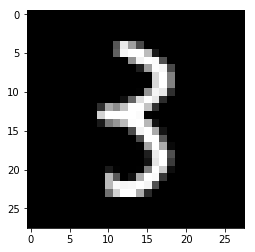

In [59]:
plt.imshow(x_train[0])

#### View the weighst after one iteration over 100 samples

Iteration 1: acc = 0.380000


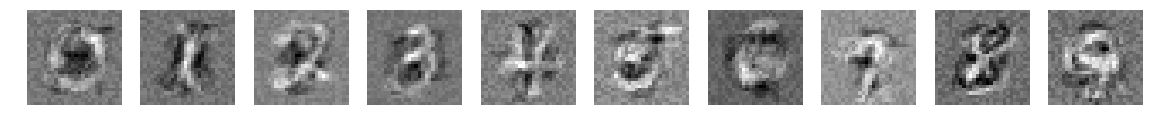

In [60]:
w = clasify_mnist(x_train, y_train, num=100, epoch=1)
umplot.show_list_images([w[i,0:28*28].reshape((28,28)) for i in range(10)])
l2= [w[i,0:28*28].reshape((28,28)) for i in range(10)].copy()

#### View the weighst after 5 iterations over 500 samples

Iteration 1: acc = 0.570000
Iteration 2: acc = 0.790000
Iteration 3: acc = 0.850000
Iteration 4: acc = 0.888000
Iteration 5: acc = 0.936000


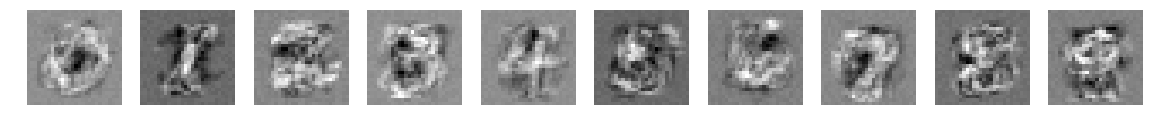

In [61]:
w = clasify_mnist(x_train, y_train, num=500, epoch=5)
umplot.show_list_images([w[i,0:28*28].reshape((28,28)) for i in range(10)])
l3=[w[i,0:28*28].reshape((28,28)) for i in range(10)].copy()

We can see that the dark areas are performing mark the "unwanted" areas.
For example, the dark area inside the zero,and the bright areas mark the "wanted" areas, as the bright stripe in the one.
#### View the weights after 5 iterations over 800 samples

Iteration 1: acc = 0.670000
Iteration 2: acc = 0.817500
Iteration 3: acc = 0.878750
Iteration 4: acc = 0.887500
Iteration 5: acc = 0.913750


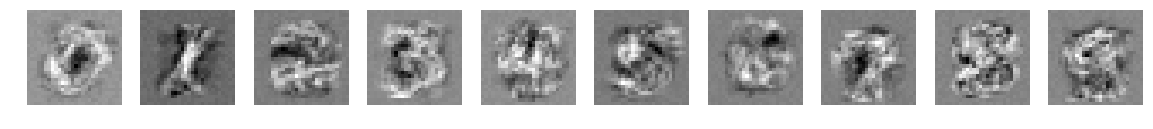

In [62]:
w = clasify_mnist(x_train, y_train, num=800, epoch=5)
umplot.show_list_images([w[i,0:28*28].reshape((28,28)) for i in range(10)])
l4=[w[i,0:28*28].reshape((28,28)) for i in range(10)].copy()

Lets view how the weights change along iterations.

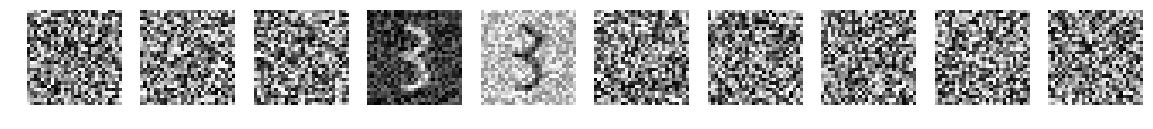

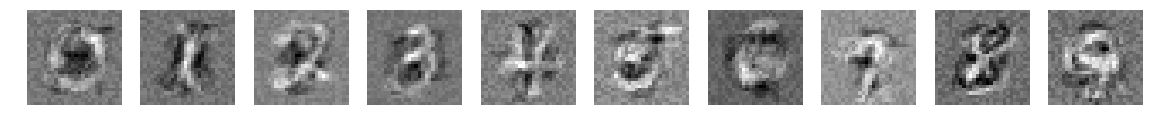

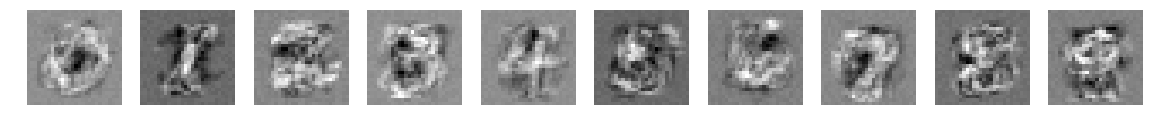

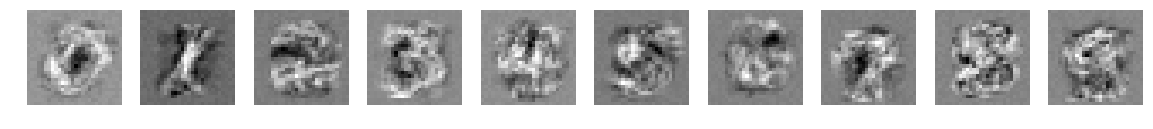

In [63]:
umplot.show_list_images(l1)
umplot.show_list_images(l2)
umplot.show_list_images(l3)
umplot.show_list_images(l4)

### Predict 
Check prediction accuracy.

In [17]:
def pred_mnist(w,inputs):
    pred=[]
    
    for x in inputs:
        
        yhat = predict(w, x)
        pred.append(yhat)
    return pred

### Lets View some predictions

In [18]:
p = pred_mnist(w, x_train[22:30])
print('Predictions: ',p)
print('True lables: ', y_train[22:30])

Predictions:  [8, 7, 0, 0, 3, 7, 0, 6]
True lables:  [8 7 0 0 3 7 0 6]


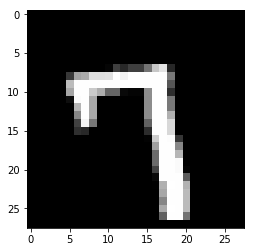

In [19]:
plt.imshow(x_train[23])

### Evaluate
All though accuracy is not the best measure for classification,we will use it For simplicity - accuracy score:<br>
![title](https://raw.githubusercontent.com/naomifridman/Introduction_to_deep_learning/master/imgs/part2_form4.JPG)


In [20]:
y_pred = pred_mnist(w,x_train)
print('accuracy on train group:', accuracy_score(y_train, y_pred))

accuracy on train group: 0.8148833333333333


In [21]:
y_pred_test = pred_mnist(w,x_test)
print('accuracy on test group:', accuracy_score(y_test, y_pred_test))
    

accuracy on test group: 0.822


## Conclusion
As we saw, This simple perceptron learn pretty well the Mnist dataset, but it mainly learned templates, it will not be able to generalize. To generalize, the net should learn features, not templates.<br>
To learn features, we will need a deeper network, so the first layers will learn features, and the last layers, can learn predictions  from the features.<br>
To do all that we need:
* a well defined learning method, since in deep network, we can not compare the neuron to the output to the labels.
* Practical tools to build more complex nets. 

All that in the next chapters.